# IND6212 Project
---

# Preprocessing

In [1]:
# import libraries
import csv
import numpy as np

In [2]:
# if runned on colaboratory
GOOGLE = False
if GOOGLE:
    # Load the Drive helper and mount
    from google.colab import drive
    drive.mount("/content/drive/")
    path = "/content/drive/My Drive/EPM/PhD/IND6212/Projet/"
else:
    path = ""

In [3]:
# read intakes
with open("{}data/aac_intakes.csv".format(path), "r") as file:
    reader = csv.reader(file)
    header_intake = next(reader)
    intakes = [[value for value in row] for row in reader]

In [4]:
# read outcomes
with open("{}data/aac_outcomes.csv".format(path), "r") as file:
    reader = csv.reader(file)
    header_outcome = next(reader)
    outcomes = [[value for value in row] for row in reader]

In [5]:
# convert numpy array
header_intake = np.asarray(header_intake)
header_outcome = np.asarray(header_outcome)

intakes = np.asarray(intakes)
outcomes = np.asarray(outcomes)

In [6]:
print("Intakes")
for i, c in enumerate(header_intake):
    print("{} : {}".format(i, c))

Intakes
0 : age_upon_intake
1 : animal_id
2 : animal_type
3 : breed
4 : color
5 : datetime
6 : datetime2
7 : found_location
8 : intake_condition
9 : intake_type
10 : name
11 : sex_upon_intake


In [7]:
print("Outcomes")
for i, c in enumerate(header_outcome):
    print("{} : {}".format(i, c))

Outcomes
0 : age_upon_outcome
1 : animal_id
2 : animal_type
3 : breed
4 : color
5 : date_of_birth
6 : datetime
7 : monthyear
8 : name
9 : outcome_subtype
10 : outcome_type
11 : sex_upon_outcome


In [8]:
# get the last outcome (it can be transfered multiple times, we want the last update)
# if no outcome, then we remove the example (line)
counter = 0
data = []
for i, x in enumerate(intakes, 1):
    index = np.where(outcomes[:, 1] == x[1])
    if len(index[0]) > 0 and outcomes[index[0][-1], 10]:
        data.append(np.concatenate((x, [outcomes[index[0][-1], 10]])))
    else:
        counter += 1
    print("\r{} | {}".format(i - counter, counter), end=" ")

79776 | 411                                                                                                                                                                                                                                                                                                                                                                                      

In [9]:
# add the outcome to data
data = np.asarray(data)
header = np.concatenate((header_intake, ["outcome"]))

The author of the dataset explained that Rto-Adopt = Return to Owner and Disposal = Died (see [link](https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/discussion/56707#latest-329163))

In [10]:
for row in data:
    if row[-1] == "Rto-Adopt":
        row[-1]="Return to Owner"
    if row[-1] == "Disposal":
        row[-1]="Died"

In [11]:
# remove the animal id
data = np.delete(data, 1, axis=1)
header = np.delete(header, 1, axis=0)

In [12]:
# convert intake date into a real value (year)
for x in data:
    s = x[0].split()
    if "year" in s[1]:
        x[0] = float(s[0])
    if "month" in s[1]:
        x[0] = float(s[0]) / 12.
    if "week" in s[1]:
        x[0] = float(s[0]) / 52.
    if "day" in s[1]:
        x[0] = float(s[0]) / 365.

In [13]:
# convertir animal breed to integer
mapping_breed, breed_int = np.unique(data[:, 2], return_inverse=True)
data = np.delete(data, [1, 2], axis=1)
header = np.delete(header, [1, 2], axis=0)
data = np.concatenate((data, breed_int.reshape(-1, 1)), axis=1)
header = np.concatenate((header, ["animal_breed"]))

In [14]:
print(mapping_breed)

['Abyssinian Mix' 'Affenpinscher Mix' 'Afghan Hound Mix' ...
 'Yorkshire Terrier/Standard Poodle' 'Yorkshire Terrier/Toy Poodle'
 'Yorkshire Terrier/Yorkshire Terrier']


In [15]:
# convert color to integer
mapping_color, color_int = np.unique(data[:, 1], return_inverse=True)
data = np.delete(data, 1, axis=1)
header = np.delete(header, 1, axis=0)
data = np.concatenate((data, color_int.reshape(-1, 1)), axis=1)
header = np.concatenate((header, ["color"]))

In [16]:
# remove location
data = np.delete(data, 3, axis=1)
header = np.delete(header, 3, axis=0)

In [17]:
# check if datetime and datetime2 are identical
if np.array_equal(data[:, 1], data[:, 2]):
    print("Datetime duplicated")
else:
    print("Datetime not duplicated")

Datetime duplicated


In [18]:
# remove datetime2
data = np.delete(data, 2, axis=1)
header = np.delete(header, 2, axis=0)

In [19]:
# convert condition to integer
mapping_condition, condition_int = np.unique(data[:, 2], return_inverse=True)
data = np.delete(data, 2, axis=1)
header = np.delete(header, 2, axis=0)
data = np.concatenate((data, condition_int.reshape(-1, 1)), axis=1)
header = np.concatenate((header, ["condition"]))

In [20]:
# convert type to integer
mapping_type, type_int = np.unique(data[:, 2], return_inverse=True)
data = np.delete(data, 2, axis=1)
header = np.delete(header, 2, axis=0)
data = np.concatenate((data, type_int.reshape(-1, 1)), axis=1)
header = np.concatenate((header, ["type"]))

In [21]:
print(mapping_type)

['Euthanasia Request' 'Owner Surrender' 'Public Assist' 'Stray' 'Wildlife']


In [22]:
# check if name as any impact
out = list(set(data[:, 4]))
out_name = [0 for _ in out]
out_noname = [0 for _ in out]
name, noname = 0, 0

for d in data:
    if d[2]:
        name += 1
        out_name[out.index(d[4])] += 1
    else:
        noname += 1
        out_noname[out.index(d[4])] += 1
out_noname = [o / noname for o in out_noname]
out_name = [o / name for o in out_name]

print("{:20s} | {:^15s} | {:^15s}".format("Outcome", "with name",
                                          "without name"))
print("-" * 56)
for a, b, c in zip(out, out_name, out_noname):
    print("{:20s} | {:^15.2%} | {:^15.2%}".format(a, b, c))

Outcome              |    with name    |  without name  
--------------------------------------------------------
Missing              |      0.06%      |      0.04%     
Relocate             |      0.00%      |      0.06%     
Died                 |      0.45%      |      3.05%     
Adoption             |     50.43%      |     23.37%     
Return to Owner      |     25.85%      |      1.91%     
Transfer             |     20.55%      |     51.64%     
Euthanasia           |      2.66%      |     19.92%     


In [23]:
# the presence of a name seems to have an impact on the outcome
# its value should not have any effect (difficult to evaluate)
# replace absence of a name by 0 and presence of a name by 1
for row in data:
    row[2] = 1 if row[2] else 0

In [24]:
# sex analysis
sex, count = np.unique(data[:, 3], return_counts=True)
for s, c in zip(sex, count):
    print("{:20s} : {:6d} ({:6.1%})".format(s, c, c / data.shape[0]))

Intact Female        :  23739 ( 29.8%)
Intact Male          :  25355 ( 31.8%)
NULL                 :      1 (  0.0%)
Neutered Male        :  12728 ( 16.0%)
Spayed Female        :  11168 ( 14.0%)
Unknown              :   6785 (  8.5%)


In [25]:
# check if name as any impact
out = list(set(data[:, 4]))
sex = list(set(data[:, 3]))
table = [[0 for _ in out] for _ in sex]
for d in data:
    table[sex.index(d[3])][out.index(d[4])] += 1

print(" " * 14, end="")
for o in out:
    print("{:^14s}".format(o), end="")
print("")
for i, s in zip(table, sex):
    print("{:^14s}".format(s), end="")
    for j in i:
        print("{:^14d}".format(j), end="")
    print("")

                 Missing       Relocate        Died        Adoption   Return to Owner   Transfer     Euthanasia  
Intact Female       19            1            172          11972          2246          8447          882      
Spayed Female       4             0             48           4690          3950          2099          377      
     NULL           0             0             0             0             1             0             0       
Neutered Male       3             0             42           4699          4958          2429          597      
 Intact Male        18            0            255          12178          3523          8282          1099     
   Unknown          2             14           476            70            84           2747          3392     


In [26]:
# we cannot remove unknown because it seems to have an impact on the outcome (extremly low adoption rate)
# there is only one NULL, which is suspect, we\"ll remove this
id = np.where(data[:, 3] == "NULL")[0][0]
data = np.delete(data, id, axis=0)

In [27]:
# convert sex to integer
mapping_sex, sex_int = np.unique(data[:, 3], return_inverse=True)
data = np.delete(data, 3, axis=1)
header = np.delete(header, 3, axis=0)
data = np.concatenate((data, sex_int.reshape(-1, 1)), axis=1)
header = np.concatenate((header, ["sex"]))

In [28]:
# keep only month for datetime
mapping_sex, sex_int = np.unique(data[:, 3], return_inverse=True)
for d in data:
    d[1] = int(d[1].split("-")[1])

In [29]:
# put labels (outcomes) in separate matrix
mapping_outcome, labels = np.unique(data[:, 3], return_inverse=True)
x = np.delete(data, 3, axis=1)
header = np.delete(header, 3, axis=0)

In [30]:
print(mapping_outcome)

['Adoption' 'Died' 'Euthanasia' 'Missing' 'Relocate' 'Return to Owner'
 'Transfer']


In [31]:
x = x.astype("float32")
labels = labels.astype("int")

In [32]:
for i, (row, label) in enumerate(zip(x, labels)):
    for h, value in zip(header, row):
        print("{:20s} : {}".format(h, value))
    print("\tOutcome: {}".format(label))
    print("-----------------------")
    if i > 2:
        break

age_upon_intake      : 8.0
datetime             : 7.0
name                 : 1.0
animal_breed         : 1007.0
color                : 498.0
condition            : 3.0
type                 : 3.0
sex                  : 3.0
	Outcome: 5
-----------------------
age_upon_intake      : 0.9166666865348816
datetime             : 4.0
name                 : 1.0
animal_breed         : 231.0
color                : 382.0
condition            : 3.0
type                 : 3.0
sex                  : 1.0
	Outcome: 5
-----------------------
age_upon_intake      : 0.07692307978868484
datetime             : 10.0
name                 : 0.0
animal_breed         : 952.0
color                : 194.0
condition            : 7.0
type                 : 3.0
sex                  : 0.0
	Outcome: 6
-----------------------
age_upon_intake      : 4.0
datetime             : 6.0
name                 : 1.0
animal_breed         : 924.0
color                : 415.0
condition            : 3.0
type                 : 3.0
sex   

In [33]:
# convert outcomes (y) to one_hot
y = np.eye(len(set(labels)))[labels]

In [34]:
print("Nb attributes: {}".format(x.shape[1]))
print("Nb different outcomes: {}".format(len(set(labels))))

Nb attributes: 8
Nb different outcomes: 7


# Visualization

In [35]:
from MulticoreTSNE import MulticoreTSNE as TSNE
import matplotlib.pyplot as plt

In [36]:
data_embedded = TSNE(n_jobs=-1).fit_transform(x)

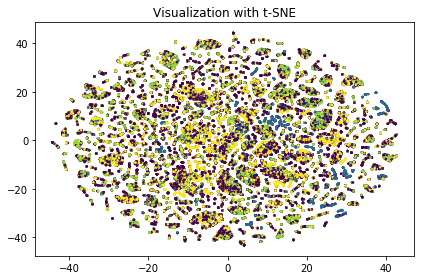

In [37]:
plt.figure(figsize=(6, 4))
plt.scatter(
    data_embedded[:, 0],
    data_embedded[:, 1],
    s=2,
    c=labels)
plt.title("Visualization with t-SNE")
plt.tight_layout()
plt.savefig("figures/visualization_multiclasse.pdf", transparent=True)
plt.show()
plt.close()

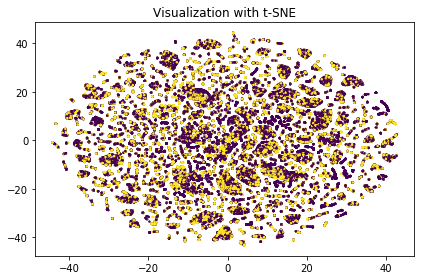

In [38]:
plt.figure(figsize=(6, 4))
plt.scatter(
    data_embedded[:, 0],
    data_embedded[:, 1],
    s=2,
    c=[int(label[0] == 1) for label in y])
plt.title("Visualization with t-SNE")
plt.tight_layout()
plt.savefig("figures/visualization_binary.pdf", transparent=True)
plt.show()
plt.close()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [40]:
# function to compute and plot the confusion matrix
def cfm(true, pred, mapping, name):
    cond_true = (len(true.shape) == 1) or (true.shape[1] == 1)
    true = true < 0.5 if cond_true else np.argmax(true, axis=1)

    cond_pred = (len(pred.shape) == 1) or (pred.shape[1] == 1)
    pred = pred < 0.5 if cond_pred else np.argmax(pred, axis=1)

    plt.figure()
    plt.gca().set_axis_off()
    plt.table(
        cellText=confusion_matrix(true, pred),
        rowLabels=mapping,
        colLabels=mapping,
        loc="center")

    plt.tight_layout()
    plt.savefig("figures/cfm_{}.pdf".format(name), transparent=True)
    plt.show()
    plt.close()

In [41]:
# function to plot the learning graphs
def plot_history(history, name):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # summarize history for accuracy
    axes[0].plot(history.history["acc"])
    axes[0].plot(history.history["val_acc"])
    axes[0].set_title("Model accuracy")
    axes[0].set_ylabel("Accuracy")
    axes[0].set_xlabel("Epoch")

    axes[0].legend(["Train", "Validation"], title="Dataset")
    # summarize history for loss
    axes[1].plot(history.history["loss"])
    axes[1].plot(history.history["val_loss"])
    axes[1].set_title("Model loss")
    axes[1].set_ylabel("Loss")
    axes[1].set_xlabel("Epoch")
    axes[1].legend(["Train", "Validation"], title="Dataset")

    plt.tight_layout()
    plt.savefig("figures/history_{}.pdf".format(name), transparent=True)
    plt.show()
    plt.close()

In [42]:
#normalize x
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [43]:
# split dataset into a training, validation and test set
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, stratify=y)
# we split first (train/test) then (train/valid) 12.5% of 80% is the same as 10% of 100%
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.125, stratify=y_train)

In [44]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(55842, 8)
(7978, 8)
(15955, 8)


In [45]:
from keras import metrics
from keras import callbacks
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model

Using TensorFlow backend.


In [46]:
input = Input(shape=(8, ))
dense = BatchNormalization()(input)
dense = Dense(256)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.5)(dense)
dense = Activation("relu")(dense)
dense = Dense(128)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.5)(dense)
dense = Activation("relu")(dense)
dense = Dense(64)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.5)(dense)
dense = Activation("relu")(dense)
dense = Dense(7)(dense)
output = Activation("softmax")(dense)

model = Model(inputs=input, outputs=output)

model.compile(
    loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2304      
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_1 (Activat

In [47]:
history = model.fit(
    x_train,
    y_train,
    batch_size=512,
    epochs=9999,
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[
        callbacks.EarlyStopping(
            monitor="val_acc",
            min_delta=0.0001,
            patience=25,
            restore_best_weights=True)
    ])

Instructions for updating:
Use tf.cast instead.
Train on 55842 samples, validate on 7978 samples
Epoch 1/9999
55842/55842 [==============================] - 6s 115us/step - loss: 1.6399 - acc: 0.4204 - val_loss: 1.1351 - val_acc: 0.5582
Epoch 2/9999
55842/55842 [==============================] - 2s 39us/step - loss: 1.1773 - acc: 0.5274 - val_loss: 1.0210 - val_acc: 0.5879
Epoch 3/9999
55842/55842 [==============================] - 2s 39us/step - loss: 1.0924 - acc: 0.5515 - val_loss: 0.9862 - val_acc: 0.5968
Epoch 4/9999
55842/55842 [==============================] - 2s 38us/step - loss: 1.0491 - acc: 0.5721 - val_loss: 0.9682 - val_acc: 0.6042
Epoch 5/9999
55842/55842 [==============================] - 2s 38us/step - loss: 1.0223 - acc: 0.5853 - val_loss: 0.9598 - val_acc: 0.6094
Epoch 6/9999
55842/55842 [==============================] - 2s 38us/step - loss: 1.0089 - acc: 0.5943 - val_loss: 0.9524 - val_acc: 0.6142
Epoch 7/9999
55842/55842 [==============================] - 2s 39us/

55842/55842 [==============================] - 2s 38us/step - loss: 0.9235 - acc: 0.6256 - val_loss: 0.8973 - val_acc: 0.6354
Epoch 58/9999
55842/55842 [==============================] - 2s 39us/step - loss: 0.9237 - acc: 0.6252 - val_loss: 0.8973 - val_acc: 0.6356
Epoch 59/9999
55842/55842 [==============================] - 2s 39us/step - loss: 0.9224 - acc: 0.6250 - val_loss: 0.8972 - val_acc: 0.6345
Epoch 60/9999
55842/55842 [==============================] - 2s 39us/step - loss: 0.9209 - acc: 0.6273 - val_loss: 0.8969 - val_acc: 0.6350
Epoch 61/9999
55842/55842 [==============================] - 2s 39us/step - loss: 0.9220 - acc: 0.6269 - val_loss: 0.8981 - val_acc: 0.6351
Epoch 62/9999
55842/55842 [==============================] - 2s 39us/step - loss: 0.9214 - acc: 0.6271 - val_loss: 0.8969 - val_acc: 0.6350
Epoch 63/9999
55842/55842 [==============================] - 2s 38us/step - loss: 0.9217 - acc: 0.6264 - val_loss: 0.8961 - val_acc: 0.6350
Epoch 64/9999
55842/55842 [=======

In [48]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.8818495131181497
Test accuracy: 0.636101535572523


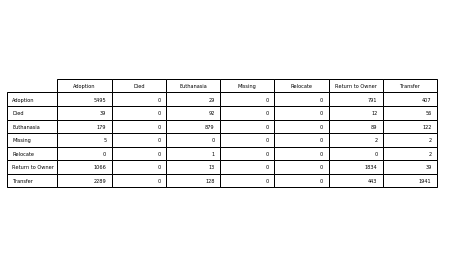

In [49]:
cfm(y_test, model.predict(x_test), mapping_outcome, "discret_multiclasse")

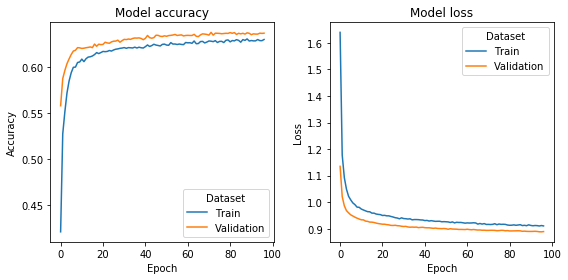

In [50]:
plot_history(history, "discret_multiclasse")

In [51]:
# not accurate enough, let"s only check if the animal is adopted
binary_y = np.asarray([int(label[0] == 1) for label in y])
# split dataset into a training, validation and test set
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, binary_y, test_size=0.2, stratify=binary_y)
# we split first (train/test) then (train/valid) 12.5% of 80% is the same as 10% of 100%
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.125, stratify=y_train)

In [52]:
input = Input(shape=(8, ))
dense = BatchNormalization()(input)
dense = Dense(256)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.5)(dense)
dense = Activation("relu")(dense)
dense = Dense(128)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.5)(dense)
dense = Activation("relu")(dense)
dense = Dense(64)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.5)(dense)
dense = Activation("relu")(dense)
dense = Dense(32)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.5)(dense)
dense = Activation("relu")(dense)
dense = Dense(1)(dense)
output = Activation("sigmoid")(dense)

model = Model(inputs=input, outputs=output)

model.compile(
    loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 8)                 32        
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2304      
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
__________

In [53]:
key, value = np.unique(y_train, return_counts=True)
class_weight = dict(zip(key, max(value) / value))
print(class_weight)

{0: 1.0, 1: 1.3736291762305535}


In [54]:
history = model.fit(
    x_train,
    y_train,
    batch_size=512,
    epochs=9999,
    verbose=1,
    class_weight=class_weight,
    validation_data=(x_val, y_val),
    callbacks=[
        callbacks.EarlyStopping(
            monitor="val_acc",
            min_delta=0.001,
            patience=10,
            restore_best_weights=True)
    ])

Train on 55842 samples, validate on 7978 samples
Epoch 1/9999
55842/55842 [==============================] - 5s 86us/step - loss: 0.8087 - acc: 0.5760 - val_loss: 0.6078 - val_acc: 0.6233
Epoch 2/9999
55842/55842 [==============================] - 3s 45us/step - loss: 0.7294 - acc: 0.6084 - val_loss: 0.6089 - val_acc: 0.6336
Epoch 3/9999
55842/55842 [==============================] - 3s 46us/step - loss: 0.7145 - acc: 0.6237 - val_loss: 0.6040 - val_acc: 0.6460
Epoch 4/9999
55842/55842 [==============================] - 3s 45us/step - loss: 0.7062 - acc: 0.6420 - val_loss: 0.6016 - val_acc: 0.6540
Epoch 5/9999
55842/55842 [==============================] - 3s 46us/step - loss: 0.7019 - acc: 0.6494 - val_loss: 0.5974 - val_acc: 0.6623
Epoch 6/9999
55842/55842 [==============================] - 3s 45us/step - loss: 0.6966 - acc: 0.6607 - val_loss: 0.5920 - val_acc: 0.6721
Epoch 7/9999
55842/55842 [==============================] - 3s 45us/step - loss: 0.6936 - acc: 0.6681 - val_loss: 0.5

In [55]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5676645581754387
Test accuracy: 0.6990285177396705


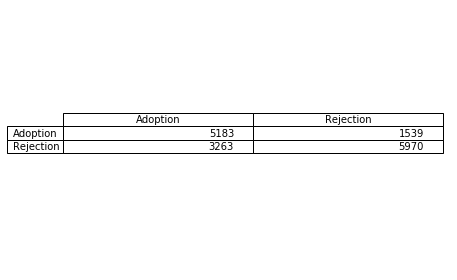

In [56]:
cfm(y_test, model.predict(x_test), ["Adoption", "Rejection"], "discret_binaire")

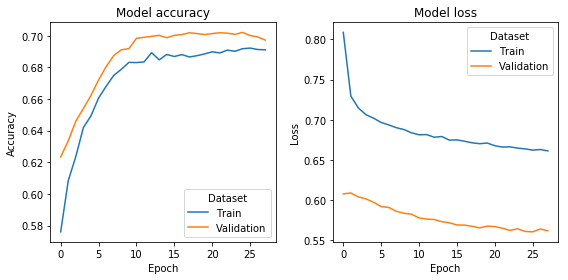

In [57]:
plot_history(history, "discret_binaire")

In [58]:
# Let"s try with one hot vector input (except age, data which are real valued -> scaled version, and name that is arleady binary)
one_hot_animal_breed = np.eye(len(set(x[:, 3])))[x[:, 3].astype("int")]
one_hot_color = np.eye(len(set(x[:, 4])))[x[:, 4].astype("int")]
one_hot_condition = np.eye(len(set(x[:, 5])))[x[:, 5].astype("int")]
one_hot_type = np.eye(len(set(x[:, 6])))[x[:, 6].astype("int")]
one_hot_sex = np.eye(len(set(x[:, 7])))[x[:, 7].astype("int")]

x_one_hot = np.concatenate(
    (x_scaled[:, :2], x[:, 2].reshape(-1, 1), one_hot_animal_breed,
     one_hot_color, one_hot_condition, one_hot_type, one_hot_sex),
    axis=1)

In [59]:
# split dataset into a training, validation and test set
x_train, x_test, y_train, y_test = train_test_split(
    x_one_hot, binary_y, test_size=0.2, stratify=binary_y)
# we split first (train/test) then (train/valid) 12.5% of 80% is the same as 10% of 100%
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.125, stratify=y_train)

In [60]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(55842, 2709)
(7978, 2709)
(15955, 2709)


In [61]:
input = Input(shape=(2709, ))
dense = BatchNormalization()(input)
dense = Dense(128)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.75)(dense)
dense = Activation("relu")(dense)
dense = Dense(64)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.75)(dense)
dense = Activation("relu")(dense)
dense = Dense(32)(dense)
dense = BatchNormalization()(dense)
dense = Dropout(0.75)(dense)
dense = Activation("relu")(dense)
dense = Dense(1)(dense)
output = Activation("sigmoid")(dense)

model = Model(inputs=input, outputs=output)

model.compile(
    loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 2709)              0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 2709)              10836     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               346880    
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
__________

In [62]:
key, value = np.unique(y_train, return_counts=True)
class_weight = dict(zip(key, max(value) / value))
print(class_weight)

{0: 1.0, 1: 1.3736291762305535}


In [63]:
history = model.fit(
    x_train,
    y_train,
    batch_size=512,
    epochs=9999,
    verbose=1,
    class_weight=class_weight,
    validation_data=(x_val, y_val),
    callbacks=[
        callbacks.EarlyStopping(
            monitor="val_acc",
            min_delta=0.001,
            patience=10,
            restore_best_weights=True)
    ])

Train on 55842 samples, validate on 7978 samples
Epoch 1/9999
55842/55842 [==============================] - 6s 115us/step - loss: 0.9545 - acc: 0.5079 - val_loss: 0.6623 - val_acc: 0.5913
Epoch 2/9999
55842/55842 [==============================] - 4s 74us/step - loss: 0.8188 - acc: 0.5318 - val_loss: 0.6395 - val_acc: 0.5971
Epoch 3/9999
55842/55842 [==============================] - 4s 65us/step - loss: 0.7722 - acc: 0.5552 - val_loss: 0.6237 - val_acc: 0.6128
Epoch 4/9999
55842/55842 [==============================] - 4s 67us/step - loss: 0.7480 - acc: 0.5835 - val_loss: 0.6075 - val_acc: 0.6312
Epoch 5/9999
55842/55842 [==============================] - 4s 79us/step - loss: 0.7259 - acc: 0.6092 - val_loss: 0.5891 - val_acc: 0.6508
Epoch 6/9999
55842/55842 [==============================] - 4s 75us/step - loss: 0.7091 - acc: 0.6276 - val_loss: 0.5796 - val_acc: 0.6581
Epoch 7/9999
55842/55842 [==============================] - 4s 73us/step - loss: 0.6968 - acc: 0.6446 - val_loss: 0.

In [64]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5713632368473601
Test accuracy: 0.7058602319246398


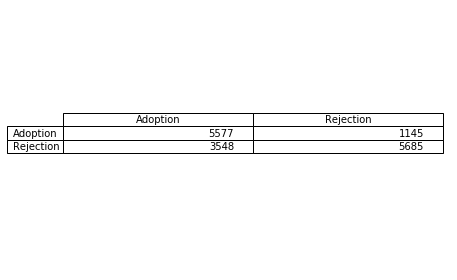

In [65]:
cfm(y_test, model.predict(x_test), ["Adoption", "Rejection"],
    "one_hot_binaire")

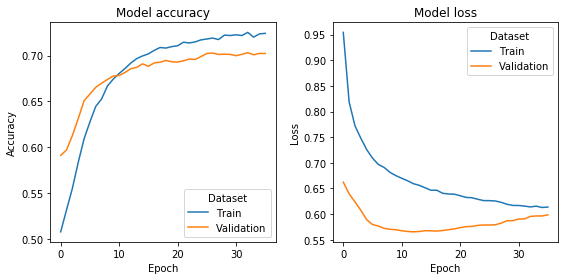

In [66]:
plot_history(history, "one_hot_binaire")